In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import yaml
import sys
import os
%matplotlib inline

In [2]:
libraries = (('Matplotlib', mpl), ('Numpy', np), 
                ('Sklearn', sklearn), ('Seaborn', sns), 
            ('Pandas', pd))

print("Python version:", sys.version, '\n')
for lib in libraries:
    print('{0} version: {1}'.format(lib[0], lib[1].__version__))

Python version: 3.7.1 (default, Dec  7 2018, 07:03:36) 
[Clang 10.0.0 (clang-1000.11.45.2)] 

Matplotlib version: 3.0.1
Numpy version: 1.15.3
Sklearn version: 0.20.0
Seaborn version: 0.9.0
Pandas version: 0.23.4


In [14]:
# Collect all data for visualization
def getData(path):
    data = []
    cpu = []
    for i in range(1,11):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        if(data[i-1]['placement']['alloc_node_res'][2]['name'] != 'vnf_user'):
            cpu.append(data[i-1]['placement']['alloc_node_res'][2]['cpu'])
        else:
            cpu.append(data[i-1]['placement']['alloc_node_res'][1]['cpu'])
    return cpu

In [16]:
default = []
groundTruth = []
linear = []
xgboost = []
randomForest = []
gradient = []
ridge = []
svm = []
dataRate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Input data rate

# get predicted CPU data
groundTruth = getData('DataForVis/inv')

xgboost = getData('DataForVis/xgb')




ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/tuple'
  in "DataForVis/xgb/AB6.yaml", line 67, column 11

## Visualization
##### Some nice plots

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

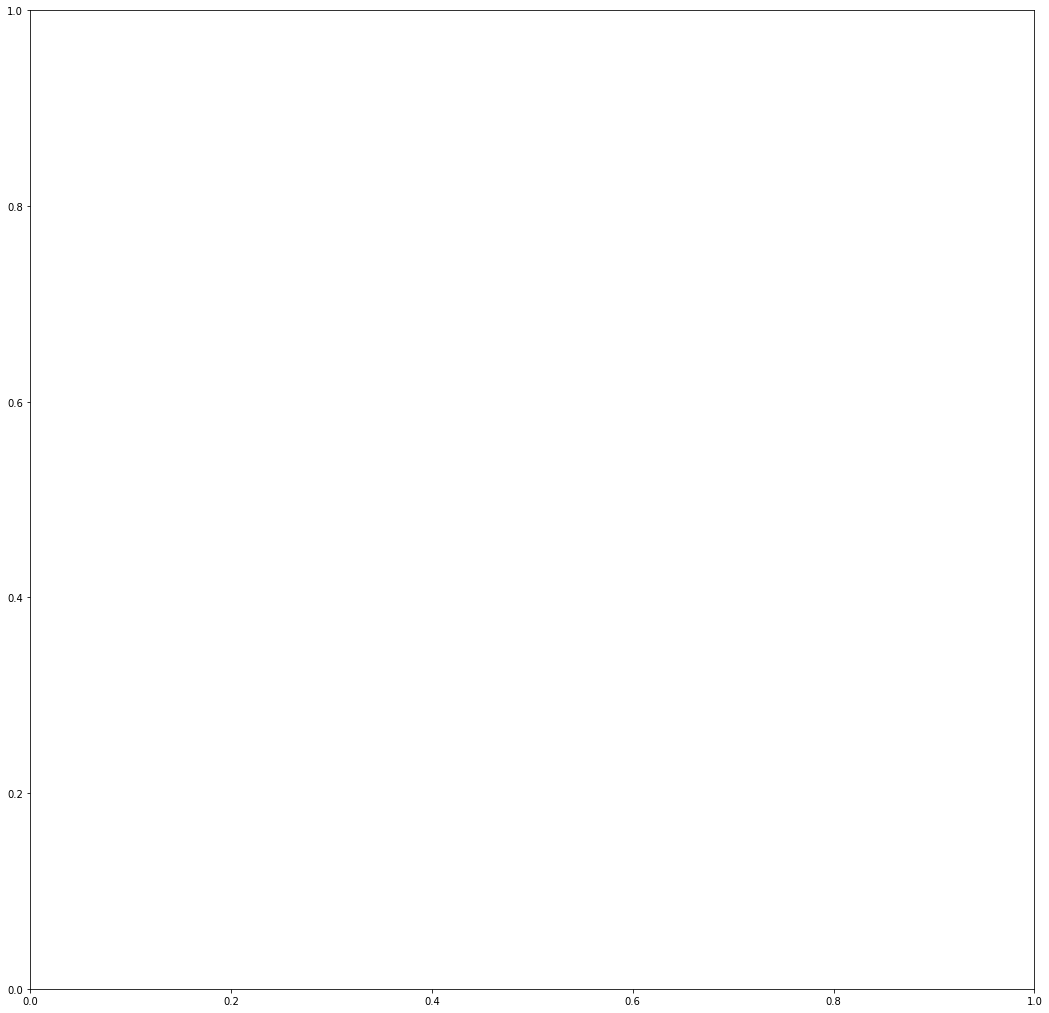

In [8]:
# data rate vs CPU
fig = plt.figure(figsize=(18, 18))

#plt.plot(dataRate, default, color='y',linewidth=14.0, linestyle='--',label="Default")

plt.plot(dataRate, groundTruth, color='orange',linewidth=14.0, linestyle='--',label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',linewidth=4.0,label="XGB")



plt.xlabel('Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()

In [ ]:
# data rate vs CPU

fig = plt.figure(figsize=(18, 18))

plt.scatter(dataRate, default, color='y',linewidth=14.0, linestyle='--',label="Default")

plt.scatter(dataRate, groundTruth, color='orange',linewidth=14.0, linestyle='--',label="Ground Truth")
plt.scatter(dataRate, linear, color='b',linewidth=20.0, linestyle='--', label="Linear")
plt.scatter(dataRate, xgboost, color='r', linewidth=4.0,label="XG Boost")
plt.scatter(dataRate, gradient, color='magenta',linewidth=4.0,label="Gradient Boost")
plt.scatter(dataRate, ridge, color='black',linewidth=4.0,label="Ridge Regression")
plt.scatter(dataRate, svm, color='grey',linewidth=4.0,label="SVM")
plt.scatter(dataRate, randomForest, color='pink',linewidth=4.0,label="Random Forest")


plt.xlabel('Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()